# Data Science 2
## Numerical analysis - Numerical integration

The following material is covered in Chapter 6 - *Numerical Integration* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

### Introduction

[Numerical integration](https://en.wikipedia.org/wiki/Numerical_integration), also known as *quadrature*, is intrinsically a much more accurate procedure than numerical differentiation. Quadrature approximates the definite integral

$$
I = \int_a^b f(x) \text{d}x
$$

by the sum

$$
I \approx \sum_{i=0}^n A_i f(x_i)
$$

where the *abscissas* $x_i$ and *weights* $A_i$ depend on the particular rule used for the quadrature. All rules of quadrature are derived from polynomial interpolation of the integrand. Therefore, they work best if $f(x)$ can be approximated by a polynomial.

### Newton-Cotes Formulas

[Newton-Cotes formulas](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas) are characterized by equally spaced abscissas and include well-known methods such as the trapezoidal rule and Simpson’s rule. They are most useful if $f(x)$ has already been computed at equal intervals or can be computed at low cost. Because Newton-Cotes formulas are based on local interpolation, they require only a piecewise fit to a polynomial.

Consider the definite integral $I = \int_a^b f(x) \text{d}x$. We divide the range of integration $a < x < b$ into $n$ equal intervals of length $h = \frac{b-a}{n}$, and denote the abscissas of the resulting nodes by $x_0$, $x_1$ ,... , $x_n$. Next we approximate $f(x)$ by a polynomial of degree $n$ that intersects all the nodes.

If $n = 1$, we approximate the function $f(x)$ by a linear function. The area under the curve therefore corresponds with a trapezoid. Its area equals

$$
I = \left( f(a) + f(b) \right) \frac{h}{2}
$$

This is known as the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). In practice the trapezoidal rule is applied in a piecewise fashion. The function $f(x)$ to be integrated is approximated by a piecewise linear function through all points $(x_i, f(x_i))$. From the trapezoidal rule we obtain for the approximate total area representing $\int_a^b f(x) \text{d}x$

$$
I = \sum_{i=0}^{n-1} I_i = \left( f(x_0) + 2 f(x_1) + 2 f(x_2) + \ldots + 2 f(x_{n-1}) + f(x_n) \right) \frac{h}{2}
$$

which is the *composite trapezoidal rule*.

It can be shown that the error in each term $I_i$ is of the order $\mathcal{O}(h^3)$. However, because the number of trapezoids equals $n = \frac{b-a}{h}$, the error of the composite trapezoidal rule cumulates to $\mathcal{O}(h^2)$.

**Exercise 1**

Complete the below function `trapezoid()` that implements the composite trapezoidal rule. Choose a reasonable default for the number of intervals.

In [1]:
def trapezoid(f, a, b, n=1000):
    """df = trapezoid(f, a, b, n=1000).
    Calculates the definite integral of the function f(x)
    from a to b using the composite trapezoidal rule with
    n subdivisions (with default n=...).
    a = begin range
    b = end range
    """  
    h = (b-a) / n
    I = f(a)+f(b)
    for i in range(1, n):
        xi = a + i*h  # Calculates each X value
        I += 2*f(xi)  # calculates according to the comp trap rule
    I *= h/2
    return I

Below, we apply the composite trapezoidal rule to calculate the integral of the cosine function from $-\frac{\pi}{2}$ to $\frac{\pi}{2}$, which analytically evaluates to $\int_{-\pi/2}^{\pi/2} \cos(x) \text{d}x = \sin(\frac{\pi}{2}) - \sin(-\frac{\pi}{2}) = 2$. Verify that the error of the composite trapezoidal rule is of order $\mathcal{O}(h^2)$.

In [2]:
# Example: integral of cos(x) from -pi/2 to pi/2
from math import cos, pi

ns = [1, 10, 100, 1000, 10000, 100000]
I_exact = 2.0
for n in ns:
    I_trapezoid = trapezoid(cos, -0.5 * pi, 0.5 * pi, n)
    print(f'n = {n:8}: {I_trapezoid:10.3e} (error={I_trapezoid-I_exact:8.1e})')

n =        1:  1.924e-16 (error=-2.0e+00)
n =       10:  1.984e+00 (error=-1.6e-02)
n =      100:  2.000e+00 (error=-1.6e-04)
n =     1000:  2.000e+00 (error=-1.6e-06)
n =    10000:  2.000e+00 (error=-1.6e-08)
n =   100000:  2.000e+00 (error=-1.6e-10)


### Recursive Trapezoidal Rule

Let $I_k$ be the integral evaluated with the composite trapezoidal rule using $2^k$ panels. Note that if $k$ is increased by one, the number of panels is doubled. Using the notation $h_k=\frac{b−a}{2^k}$ for the interval size, we obtain the following results.

* $k = 0$ (one panel):

$$
I_0 = \left( f(a) + f(b) \right) \frac{h_0}{2}
$$

* $k = 1$ (two panels):

$$
I_1 = \left( f(a) + 2 f(a+h_1) + f(b) \right) \frac{h_1}{2} = \frac{1}{2} I_0 + f(a+h_1) h_1
$$

* $k = 2$ (four panels):

$$
I_2 = \left( f(a) + 2 f(a+h_2) + 2 f(a+2h_2) + 2 f(a+3h_2) + f(b) \right) \frac{h_2}{2} = \frac{1}{2} I_1 + \left( f(a+h_2) + f(a+3h_2) \right) h_2
$$

We can now see that for arbitrary $k > 0$ we have

$$
I_k = \frac{1}{2} I_{k-1} + h_k \cdot \sum_{i=1, 3, 5, \ldots, 2^k-1} f(a+i \cdot h_k)
$$

which is the *recursive trapezoidal rule*. Observe that the summation contains only the new nodes that were created when the number of panels was doubled. Therefore, the computation of the entire sequence $I_0, I_1, \ldots, I_k$ involves the same amount of algebra as the calculation of $I_k$ directly.

However, the advantage of using the recursive trapezoidal rule is that it allows us to monitor convergence and terminate the process when the difference between $I_{k−1}$ and $I_k$ becomes sufficiently small.

**Exercise 2**

Rewrite the function `trapezoid()` such that it computes $I_k$ iteratively, given $I_{k−1}$, until it achieves an estimated accuracy set by the user through the tolerance parameter `tol` (i.e., stop when $|I_k - I_{k−1}| < \text{tol}$). Again, pick a reasonable default value for that tolerance parameter.

In [3]:
hk = lambda a, b, k: (b-a)/(2**k)
hk(1, 10, 3)

1.125

In [4]:
import numpy as np

def trapezoid(f, a, b, tol=1e-6):
    """df = trapezoid(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using the recursive trapezoidal rule with
    an absolute tolerance tol (with default ...).
    """
    hk = lambda a, b, k: (b-a)/(2**k)
    
    h0 = hk(a, b, 0)
    I0 = (f(a)+f(b))*(h0/2)  # with k=0
    h1 = hk(a, b, 1)
    I1 = (1/2)*I0 + f(a+h1)*h1  # with k=1
    
    for k in range(2, 100, 1):
        if abs(I1-I0) < tol:  # I1 = Ik and I0 = I_k-1
#             return 'I = {:.16E}, Error = {:.3E}'.format(I1, I1-I0)
            return I1
        else:
            I0 = I1  # Update the value for I_k-1
            # calculate the next value for Ik
            # No need for -1, because endpoint is not included
            varsum = 0
            for i in range(1, 2**k, 2):  
                varsum += f(a+i*hk(a, b, k))
            I1 = (1/2)*I0 + hk(a, b, k)*varsum
#             print(I1-I0)
            
    # 1.  calculate I0 and I1, subtract the values to see if < tol
    # 2.  save the previous value and loop through I2+ and every loop checking the tol
    # 3. If less then tolerance, break loop and return Ik
    
trapezoid(np.cos, -0.5 * np.pi, 0.5 * np.pi, 1e-10)

1.999999999976045

Below, we again apply the recursive version of the composite trapezoidal rule to calculate the integral of the cosine function from $-\frac{\pi}{2}$ to $\frac{\pi}{2}$. Verify that the specified tolerance (or better) is indeed reached.

In [5]:
# Example: integral of cos(x) from -pi/2 to pi/2
I_exact=2
I_trapezoid = trapezoid(np.cos, -0.5 * np.pi, 0.5 * np.pi, 1e-4)
print(f'I: {I_trapezoid:13.6e} (error={I_trapezoid-I_exact:8.1e})')

I:  1.999975e+00 (error=-2.5e-05)


### Simpson's Rule

[Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) can be obtained from Newton-Cotes formulas with $n = 2$; that is, by passing a parabolic interpolant through three adjacent nodes, each separated by $h$. The area under the parabola, which represents an approximation of $I = \int_a^b f(x) \text{d}x$, can be shown to equal

$$
I = \left( f(a) + 4 f(\frac{a+b}{2}) + f(b) \right) \frac{h}{3}
$$

To obtain the *composite Simpson's rule*, the integration range $(a, b)$ is divided into $n$ panels (with $n$ even) of width $h = \frac{b − a}{n}$ each. Applying the above formula to two adjacent panels, we obtain

$$
I = \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n−2}) + 4f(x_{n−1}) + f(x_n) \right) \frac{h}{3}
$$

The composite Simpson's rule is perhaps the best known method of numerical integration. However, its reputation is somewhat undeserved, because the trapezoidal rule is more robust and Romberg integration (below) is more efficient.

**Exercise 3**

Write a function `simpson()` that implements the composite Simpson's rule.

In [6]:
def simpson(f, a, b, n=1000):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    n += n % 2  # Makes the n a even number
    h = (b-a) / n
    I = f(a)+f(b)
    
    for i in range(1, n, 2):
        xi = a + i*h
        I += 4*f(xi)
    
    for i in range(2, n, 2):
        xi = a + i*h
        I += 2*f(xi)
    I *= (h/3)
    return I

def simpson2(f, a, b, n=1000):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    n += n % 2  # Makes the n a even number
    h = (b-a) / n
    I = f(a)+f(b)
    
    for i in range(1, n):
        if i % 2 == 1:
            xi = a + i*h
            I += 4*f(xi)
        elif i % 2 == 0:
            xi = a + i*h
            I += 2*f(xi)
            
    I *= (h/3)
    return I

We once more apply the composite Simpson's rule to the cosine integral. What is the order of the method, and why does its accuracy start to break up when $n$ reaches 10000?

In [7]:
# Example: integral of cos(x) from -pi/2 to pi/2
I_exact = 2.0
for n in ns:
    I_simpson = simpson(cos, -0.5 * pi, 0.5 * pi, n)
    print(f'n = {n:8}: {I_simpson:10.3e} (error={I_simpson-I_exact:8.1e})')
    
for n in ns:
    I_simpson2 = simpson2(cos, -0.5 * pi, 0.5 * pi, n)
    print(f'n = {n:8}: {I_simpson2:10.3e} (error={I_simpson2-I_exact:8.1e})')

n =        1:  2.094e+00 (error= 9.4e-02)
n =       10:  2.000e+00 (error= 1.1e-04)
n =      100:  2.000e+00 (error= 1.1e-08)
n =     1000:  2.000e+00 (error= 1.1e-12)
n =    10000:  2.000e+00 (error=-1.2e-14)
n =   100000:  2.000e+00 (error= 2.7e-15)
n =        1:  2.094e+00 (error= 9.4e-02)
n =       10:  2.000e+00 (error= 1.1e-04)
n =      100:  2.000e+00 (error= 1.1e-08)
n =     1000:  2.000e+00 (error= 1.1e-12)
n =    10000:  2.000e+00 (error=-7.5e-15)
n =   100000:  2.000e+00 (error=-2.0e-14)


In [8]:
# Order to the -4th, look in the middle, the order changes -4 (-4, -8, -12). So the error in the formula should be h**4

Simpson's rule can also be converted to a recursive form. However, this is a bit more challenging because the weights of the odd and even terms alternate.

### Romberg Integration

[Romberg integration](https://en.wikipedia.org/wiki/Romberg%27s_method) is based on the trapezoidal rule. It evaluates an integral using a series of different interval sizes. Subsequently, these various answers are averaged using carefully chosen weights that are tuned in such a way that the errors tend to cancel. Thus, a solution can be found that is much more accurate than any of the individual evaluations. This approach of combining multiple solutions is called [Richardson extrapolation](https://en.wikipedia.org/wiki/Richardson_extrapolation).

We will not derive the method here, but merely describe it. For more details, see the book chapter.

Let us first introduce the notation $R_{k,0} = I_k$, where, as before, $I_k$ represents the approximate value of $I = \int_a^b f(x) \text{d}x$ computed by the recursive trapezoidal rule using $2^k$ panels. Romberg integration starts with the computation of $R_{0,0} = I_0$ (one panel) and $R_{1,0} = I_1$ (two panels) from the trapezoidal rule. We already know that these have an error of order $\mathcal{O}(h^2)$. These two estimates are combined linearly in order to obtain a better estimate according to $R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0}$ that turns out to have an error $\mathcal{O}(h^4)$.

It is convenient to store the results in a triangular array of the form

$$
\begin{array}{cc}
R_{0,0} = I_0 &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0}\\
R_{1,0} = I_1 &
\end{array}
$$

The next step is to calculate $R_{2,0} = I_2$ (four panels) and repeat the combination procedure with $R_{1,0}$ and $R_{2,0}$, storing the result as $R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0}$. The elements $R_{2,0}$ and $R_{2,1}$ are now both $\mathcal{O}(h^4)$ approximations, which can in turn be combined to obtain $R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1}$ with error $\mathcal{O}(h^6)$. The array has now expanded to

$$
\begin{array}{ccc}
R_{0,0} = I_0 & &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0} &\\
R_{1,0} = I_1 & & R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1}\\
& R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0} &\\
R_{2,0} = I_2 & &
\end{array}
$$

After another round of calculations we get

$$
\begin{array}{cccc}
R_{0,0} = I_0 & & &\\
& R_{1,1} = \frac{4}{3} R_{1,0} - \frac{1}{3} R_{0,0} & &\\
R_{1,0} = I_1 & & R_{2,2} = \frac{16}{15} R_{2,1} - \frac{1}{15} R_{1,1} &\\
& R_{2,1} = \frac{4}{3} R_{2,0} - \frac{1}{3} R_{1,0} & & R_{3, 3} = \frac{64}{63} R_{3,2} - \frac{1}{63} R_{2,2}\\
R_{2,0} = I_2 & & R_{3,2} = \frac{16}{15} R_{3,1} - \frac{1}{15} R_{2,1} &\\
& R_{3,1} = \frac{4}{3} R_{3,0} - \frac{1}{3} R_{2,0} & &\\
R_{3,0} = I_3 & & &
\end{array}
$$

where the error in $R_{3,3}$ is $\mathcal{O}(h^8)$.

The general extrapolation formula used in this scheme is

$$
R_{i,j} = \frac{4^j R_{i,j−1} - R_{i−1,j−1}}{4^j - 1}
$$

**Exercise 4**

Implement a function `romberg()` that performs Romberg integration until a tolerance `tol` is achieved. Note that the most accurate estimate of the integral is always the last diagonal term of the array, so the process needs to be continued until the difference between two successive diagonal terms $|R_{i,i} - R_{i-1,i-1}| < \text{tol}$. Although the triangular array is convenient for hand computations, computer implementation of the Romberg algorithm can be carried out within a one-dimensional array $\boldsymbol{r}$ (i.e. a list or a vector) that contains a diagonal row of the array $R_{i, :}$ at any time.

In [9]:
def my_romberg(f, a, b, tol=1e-6):
    """df = simpson(f, a, b, tol=1e-6).
    Calculates the definite integral of the function f(x)
    from a to b using Romberg integration based on the
    trapezoidal rule until a specified tolerance tol is
    reached (with default tol=...).
    """
    #  First perform the recursive trapezoid rule to get all the Rx0 values 
    hk = lambda a, b, k: (b-a)/(2**k)
    h0 = hk(a, b, 0)
    I0 = (f(a)+f(b))*(h0/2)  # with k=0
    h1 = hk(a, b, 1)
    I1 = (1/2)*I0 + f(a+h1)*h1  # with k=1
    
    Ilist = [I0, I1]
    
    for k in range(2, 10000, 1):
        if abs(I1-I0) < tol:  # I1 = Ik and I0 = I_k-1
            break
        else:
            I0 = I1  # Update the value for I_k-1
            varsum = 0
            for i in range(1, 2**k, 2):  
                varsum += f(a+i*hk(a, b, k))
            I1 = (1/2)*I0 + hk(a, b, k)*varsum
            Ilist.append(I1)

    Rij = lambda ra, rb, j: (((4**j)*ra)-rb)/((4**j)-1)
    while len(Ilist) != 1:
#         print(len(Ilist), Ilist)
        Rlist = []
        j = 0
        for val in range(0, len(Ilist)-1, 1):
            j += 1
#             print(j, Rij(Ilist[val+1], Ilist[val], j))
            Rlist.append(Rij(Ilist[val+1], Ilist[val], j))
        Ilist = Rlist
    return Ilist[0]

my_romberg(np.cos, -0.5 * np.pi, 0.5 * np.pi, tol=1e-12)

1.9999999999732525

In [10]:
def rombergDave(f, a, b, tol=1e-6):
    """df = simpson(f, a, b, tol=1e-6).
    Calculates the definite integral of the function f(x)
    from a to b using Romberg integration based on the
    trapezoidal rule until a specified tolerance tol is
    reached (with default tol=...).
    """
    h = b-a  # interval size
    n = 1
    Rold = [(f(a) + f(b)) * (h/2)]
    error = 1e10
    while error > tol:
        h /= 2.0
        n *= 2
        Rnew = [ 0.5 * Rold[0] + sum(f(a+o*h) for o in range(1, n, 2)) * h]
        factor = 1
        for R in Rold:
            factor *= 4
            Rnew.append( (factor * Rnew[-1] - R) / (factor - 1))
        error = abs(Rnew[-1] - Rold[-1])
        Rold = Rnew
    return Rnew[-1]

We apply the Romberg integration rule to the cosine integral one final time. Once more, verify that the specified tolerance (or better) is indeed reached.

In [11]:
# Example: integral of cos(x) from -pi/2 to pi/2
I_romberg = my_romberg(np.cos, -0.5 * np.pi, 0.5 * np.pi, tol=1e-12)
print(f'I: {I_romberg:13.6e} (error={I_romberg-I_exact:8.1e})')

I:  2.000000e+00 (error=-2.7e-11)


In [12]:
# Example: integral of cos(x) from -pi/2 to pi/2
I_romberg = rombergDave(np.cos, -0.5 * np.pi, 0.5 * np.pi, tol=1e-12)
I_exact = 2.0
print(f'I: {I_romberg:13.6e} (error={I_romberg-I_exact:8.1e})')

I:  2.000000e+00 (error=-4.4e-16)


### Exercises

**Exercise 5**

Determine the value of the definite integral $\int_0^1 2^x \text{d}x$ to approximately six decimals using the following three methods:

* analytically, using symbolic integration;

* using your own functions `trapezoid()`, `simpson()` and `romberg()`;

* using the functions [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html) and [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) of the module `scipy.integrate`.

Which are the most accurate?

In [13]:
from scipy.integrate import quadrature, romberg

In [14]:
int2x = lambda x : 2**x
print('Self written')
print(f'trapezoid: {trapezoid(int2x, 0, 1)}')
print(f'simpson: {simpson(int2x, 0, 1)}')
print(f'romberg: {my_romberg(int2x, 0, 1)}')
print('\n')
print('Scipy')
print(f'quadrature: {quadrature(int2x, 0, 1)}')
print(f'romberg: {romberg(int2x, 0, 1)}')

Self written
trapezoid: 1.4426952612345114
simpson: 1.442695040888965
romberg: 1.4426941617331377


Scipy
quadrature: (1.4426950408889492, 4.2491565821478616e-11)
romberg: 1.442695040888964


**Exercise 6**

A circle with radius 1 can be described by the equation $x^2 + y^2 = 1$. From this equation, you can derive the function $y(x)$ that describes the upper half of this circle. Theoretically, the area below this curve should therefore equal $\frac{1}{2}\pi$. Using this function in combination with the recursive trapezoid method and the Romberg integration method, calculate the value of $\pi$ up to twelve decimals accuracy. How do the runtimes of these methods compare? Hint: use the `%time` [notebook magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time).

In [15]:
import matplotlib.pyplot as plt

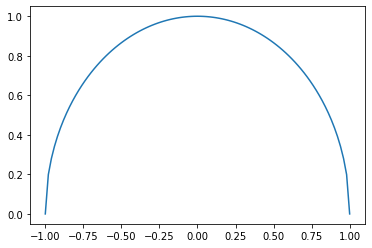

In [16]:
from math import sqrt
yx = lambda x : sqrt(1-x**2)
x = np.linspace(-1, 1, 101)
y = [yx(i) for i in x]

plt.plot(x, y)
plt.show()

In [17]:
# print(f'trapezoid: {trapezoid(yx, -1, 1, 1e-8)}')
# print(f'simpson: {simpson(yx, -1, 1)}')
print(f'romberg: {my_romberg(yx, -1, 1, 1e-8)}')
print(f'pi/2 = {np.pi/2}')

romberg: 1.5707963244876149
pi/2 = 1.5707963267948966


**Exercise 7**

Plot the function $f(x) = \sqrt{x^2-x^4}$ and calculate the area under this curve between $x=-1$ and $x=1$. Use your own trapezoid and Romberg integration rules with a tolerance `tol=1e-6`. Explain why the outcomes do not seem to make sense.

Answer: Because it is summing negative and positive together

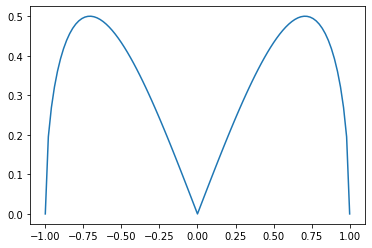

In [18]:
fx = lambda x: np.sqrt(x**2 - x**4)
x = np.linspace(-1, 1, 101)
y = [fx(i) for i in x]

plt.plot(x, y)
plt.show()

In [19]:
print(f'trapezoid: {trapezoid(fx, -1, 0, 1e-6)+trapezoid(fx, 0, 1, 1e-6)}')
print(f'romberg: {my_romberg(fx, -1, 0) + my_romberg(fx, 0, 1)}')

trapezoid: 0.6666658711749596
romberg: 0.6666662900312694


**Exercise 8**

The present functions do not seem to be able to compute integrals with bounds that involve infinity. However, this can be circumvented by means of a coordinate transformation. For instance, to calculate the integral

$$
I = \int_{-\infty}^{\infty} e^{-z^2} \text{d}z
$$

that is hopefully familiar from the gaussian distribution, we can use a transformation like for instance

$$
z = \frac{t}{1-t^2}
$$

Verify for yourself that when $t$ goes from -1 to +1, $z$ goes from $-\infty$ to $+\infty$. Now, because

$$
\frac{\text{d}z}{\text{d}t} = \frac{1+t^2}{(1-t^2)^2}
$$

the integral can be rewritten as

$$
I = \int_{-1}^1 e^{-\left( \frac{t}{1-t^2} \right)^2} \cdot \frac{1+t^2}{(1-t^2)^2} \text{d}t
$$

Compute the value of the integral $\int_{-\infty}^{\infty} e^{-z^2} \text{d}z$ to approximately nine digits accuracy using an algorithm of your own choice and compare it to the theoretical value $I = \sqrt{\pi}$. Hint: slightly adjust the integration limits to prevent division by zero errors.

In [ ]:
pass # WRITE YOUR OWN CODE HERE

***